The `clean` task will both clean the data and create an image.

Conversion factors:
* $1^\circ$ = 180 radians = 60 arcminutes
* 1 radian = $\left(\frac{60\times180}{\pi}\right)$ arcminutes $\approx 3438'$
* $\lambda = \frac{c=3e8}{\nu_0} \approx 0.165$ [m], where $\nu_0$ is the observation center frequency [MHz]

When creating an image the 2 main inputs to clean is the image size in pixels and the cell size in arcseconds per pixel.

The cell size = FWHM of synthesized beam $\approx \frac{3438}{Bmax/\lambda}$ arcminutes, which is equivalent to the interferometer resolution.

An approximation of Bmax measured in wavelengths ($\lambda$) can be read from the `plotms` graph showing _amp_ against _uvwave_: max(uvwave) - min(uvwave) = Bmax/$\lambda$   
The definition of uvwave is wavelength per channel

Thus FWHM synthbeam = 3438' / Bmax       
In order not to be limited by the cell size, the central lobe of the dirty beam needs to be well resolved.       
For MeerKAT the cell size = 2''

The image size on the other hand is given by the FWHM of the primary beam of a uniformly illuminated antenna.    
FWHM primbeam = $\frac{1.02\times 3438}{D/\lambda}$, the field of view of the interferometer

Using the cell size we obtain the image region which we round up to the closest power of 2 -- image size = 1024.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
msfile='ngc3621_fixvis.ms'
if not os.path.exists(msfile):
    raise IOError('{} file does not exist.'.format(msfile))

After splitting, the "corrected" data column in the original vis file will become the "data" and "corrected" columns and the field IDs are updated -- use listobs to inspect

In [8]:
target='0408-65'  # Flux calibrator
split_ms=target+'_split.ms'
dirty_img=target+'.dirty'
clean_img=target+'.clean'

In [9]:
split(vis=msfile, outputvis=split_ms, field=target, datacolumn='corrected')

True

Show log 2019-08-22 15:03:43	INFO	split::::	
 2019-08-22 15:03:43	INFO	split::::+	##########################################
 2019-08-22 15:03:43	INFO	split::::+	##### Begin Task: split #####
 2019-08-22 15:03:43	INFO	split::::	split(vis="ngc3621_fixvis.ms",outputvis="0408-65_split.ms",keepmms=True,field="0408-65",spw="",
 2019-08-22 15:03:43	INFO	split::::+ scan="",antenna="",correlation="",timerange="",intent="",
 2019-08-22 15:03:43	INFO	split::::+ array="",uvrange="",observation="",feed="",datacolumn="corrected",
 2019-08-22 15:03:43	INFO	split::::+ keepflags=True,width=1,timebin="0s",combine="")
 2019-08-22 15:03:43	INFO	MSTransformManager::parseMsSpecParams	Input file name is ngc3621_fixvis.ms
 2019-08-22 15:03:43	INFO	MSTransformManager::parseMsSpecParams	Data column is CORRECTED
 2019-08-22 15:03:43	INFO	MSTransformManager::parseMsSpecParams	Output file name is 0408-65_split.ms
 2019-08-22 15:03:43	INFO	MSTransformManager::parseDataSelParams	field selection is 0408-65
 2019-08-22 15:03:43	INFO	MSTransformManager::colCheckInfo	Adding DATA column to output MS from input CORRECTED_DATA column
 2019-08-22 15:03:43	INFO	MSTransformManager::initDataSelectionParams	Selected Fields Ids are [0]
 2019-08-22 15:03:43	INFO	MSTransformManager::open	Select data
 2019-08-22 15:03:43	INFO	MSTransformManager::createOutputMSStructure	Create output MS structure
 2019-08-22 15:03:43	INFO	MSTransformDataHandler::makeSelection	3129 out of 15687 rows are going to be considered due to the selection criteria.
 2019-08-22 15:03:44	INFO	split::::	CASA Version 5.5.0-149 
 2019-08-22 15:03:44	INFO	split::::	
 2019-08-22 15:03:44	INFO	split::::	##### End Task: split #####
 2019-08-22 15:03:44	INFO	split::::+	##########################################

In [12]:
tclean(vis=split_ms, imagename=dirty_img, niter=0)

{}

Show log 2019-08-22 15:05:23	INFO	tclean::::	
 2019-08-22 15:05:23	INFO	tclean::::+	##########################################
 2019-08-22 15:05:23	INFO	tclean::::+	##### Begin Task: tclean #####
 2019-08-22 15:05:23	INFO	tclean::::	tclean(vis="0408-65_split.ms",selectdata=True,field="",spw="",timerange="",
 2019-08-22 15:05:23	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2019-08-22 15:05:23	INFO	tclean::::+ datacolumn="corrected",imagename="0408-65.dirty",imsize=[100],cell=['1arcsec'],phasecenter="",
 2019-08-22 15:05:23	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="mfs",reffreq="",
 2019-08-22 15:05:23	INFO	tclean::::+ nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
 2019-08-22 15:05:23	INFO	tclean::::+ restfreq=[],interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2019-08-22 15:05:23	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2019-08-22 15:05:23	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2019-08-22 15:05:23	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2019-08-22 15:05:23	INFO	tclean::::+ deconvolver="hogbom",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2019-08-22 15:05:23	INFO	tclean::::+ restoringbeam=[],pbcor=False,outlierfile="",weighting="natural",robust=0.5,
 2019-08-22 15:05:23	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=0,gain=0.1,
 2019-08-22 15:05:23	INFO	tclean::::+ threshold=0.0,nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2019-08-22 15:05:23	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2019-08-22 15:05:23	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2019-08-22 15:05:23	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2019-08-22 15:05:23	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2019-08-22 15:05:23	INFO	tclean::::+ calcpsf=True,parallel=False)
 2019-08-22 15:05:23	INFO	tclean::::	Verifying Input Parameters
 2019-08-22 15:05:23	INFO	SynthesisImagerVi2::selectData MS : 0408-65_split.ms | [Opened in readonly mode]
 2019-08-22 15:05:23	INFO	SynthesisImagerVi2::selectData NRows selected : 3129
 2019-08-22 15:05:23	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [0408-65.dirty] : 
 2019-08-22 15:05:24	INFO	SynthesisImagerVi2::defineImage Impars : start 
 2019-08-22 15:05:24	INFO	SynthesisImagerVi2::defineImage Shape : [100, 100, 1, 1]Spectral : [1.41116e+09] at [0] with increment [2.35118e+07]
 2019-08-22 15:05:24	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [0408-65.dirty] with ftmachine : gridft
 2019-08-22 15:05:24	INFO	SynthesisImagerVi2::weight() Set imaging weights : Natural weighting
 2019-08-22 15:05:24	INFO	task_tclean::SynthesisDeconvolver::setupDeconvolution Set Deconvolution Options for [0408-65.dirty] : hogbom
 2019-08-22 15:05:24	INFO	task_tclean::SynthesisImager::makePSF ----------------------------------------------------------- Make PSF ---------------------------------------------
 2019-08-22 15:05:24	INFO	task_tclean::SIImageStore::calcSensitivity [0408-65.dirty] Theoretical sensitivity (Jy/bm):0.000264146 
 2019-08-22 15:05:24	INFO	task_tclean::SIImageStore::printBeamSet Beam : 220.624 arcsec, 92.5114 arcsec, 5.8373 deg
 2019-08-22 15:05:24	INFO	task_tclean::PBMath::initByDiameter PBMath init to Airy scaled to diameter = 13.5
 2019-08-22 15:05:24	INFO	task_tclean::SynthesisImagerVi2::makePrimaryBeam vi2 : Evaluating Primary Beam model onto image grid(s)
 2019-08-22 15:05:25	INFO	task_tclean::SynthesisImager::executeMajorCycle ----------------------------------------------------------- Run (Last) Major Cycle 1 -------------------------------------
 2019-08-22

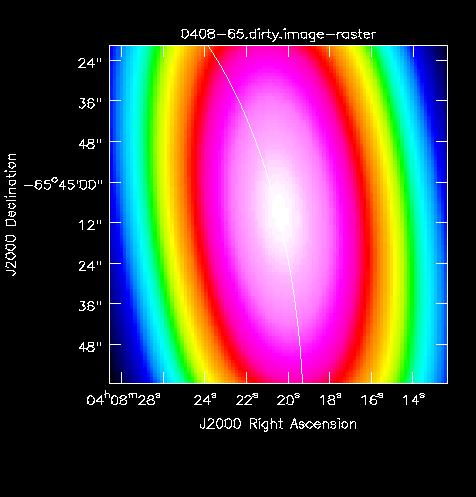

Show log 2019-08-22 15:05:50	INFO	viewer::::	
 2019-08-22 15:05:50	INFO	viewer::::+	##########################################
 2019-08-22 15:05:50	INFO	viewer::::+	##### Begin Task: viewer #####
 2019-08-22 15:05:50	INFO	viewer::::	viewer(infile="0408-65.dirty.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2019-08-22 15:05:50	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2019-08-22 15:05:56	INFO	viewer::::	##### End Task: viewer #####
 2019-08-22 15:05:56	INFO	viewer::::+	##########################################

In [13]:
viewer(dirty_img+'.image')

In [16]:
tclean(vis=split_ms,
      imagename=clean_img,
      niter=20000,
      threshold='0.005Jy',
      deconvolver='hogbom',
      imsize=1024,
      cell='2.0arcsec',
      stokes='I',
      weighting='briggs',
      robust=0.0)

{}

Show log 2019-08-22 15:10:20	INFO	tclean::::	
 2019-08-22 15:10:20	INFO	tclean::::+	##########################################
 2019-08-22 15:10:20	INFO	tclean::::+	##### Begin Task: tclean #####
 2019-08-22 15:10:20	INFO	tclean::::	tclean(vis="0408-65_split.ms",selectdata=True,field="",spw="",timerange="",
 2019-08-22 15:10:20	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2019-08-22 15:10:20	INFO	tclean::::+ datacolumn="corrected",imagename="0408-65.clean",imsize=1024,cell="2.0arcsec",phasecenter="",
 2019-08-22 15:10:20	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="mfs",reffreq="",
 2019-08-22 15:10:20	INFO	tclean::::+ nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
 2019-08-22 15:10:20	INFO	tclean::::+ restfreq=[],interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2019-08-22 15:10:20	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2019-08-22 15:10:20	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2019-08-22 15:10:20	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2019-08-22 15:10:20	INFO	tclean::::+ deconvolver="hogbom",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2019-08-22 15:10:20	INFO	tclean::::+ restoringbeam=[],pbcor=False,outlierfile="",weighting="briggs",robust=0.0,
 2019-08-22 15:10:20	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=20000,gain=0.1,
 2019-08-22 15:10:20	INFO	tclean::::+ threshold="0.005Jy",nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2019-08-22 15:10:20	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2019-08-22 15:10:20	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2019-08-22 15:10:20	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2019-08-22 15:10:20	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2019-08-22 15:10:20	INFO	tclean::::+ calcpsf=True,parallel=False)
 2019-08-22 15:10:20	INFO	tclean::::	Verifying Input Parameters
 2019-08-22 15:10:20	INFO	SynthesisImagerVi2::selectData MS : 0408-65_split.ms | [Opened in readonly mode]
 2019-08-22 15:10:20	INFO	SynthesisImagerVi2::selectData NRows selected : 3129
 2019-08-22 15:10:20	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [0408-65.clean] : 
 2019-08-22 15:10:20	INFO	SynthesisImagerVi2::defineImage Impars : start 
 2019-08-22 15:10:20	INFO	SynthesisImagerVi2::defineImage Shape : [1024, 1024, 1, 1]Spectral : [1.41116e+09] at [0] with increment [2.35118e+07]
 2019-08-22 15:10:20	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [0408-65.clean] with ftmachine : gridft
 2019-08-22 15:10:20	INFO	SynthesisImagerVi2::weight() Set imaging weights : Briggs weighting: sidelobes will be suppressed over full image
 2019-08-22 15:10:20	INFO	VisSetUtil::VisImagingWeight() Normal robustness, robust = 0
 2019-08-22 15:10:20	INFO	task_tclean::SynthesisDeconvolver::setupDeconvolution Set Deconvolution Options for [0408-65.clean] : hogbom
 2019-08-22 15:10:20	INFO	task_tclean::SynthesisIterBot::setupIteration Set Iteration Control Options
 2019-08-22 15:10:20	INFO	task_tclean::SynthesisImager::makePSF ----------------------------------------------------------- Make PSF ---------------------------------------------
 2019-08-22 15:10:21	INFO	task_tclean::SIImageStore::calcSensitivity [0408-65.clean] Theoretical sensitivity (Jy/bm):0.00126239 
 2019-08-22 15:10:21	INFO	task_tclean::SIImageStore::printBeamSet Beam : 239.483 arcsec, 87.9897 arcsec, 8.52758 deg
 2019-08-22 15:10:21	INFO	task_tclean::PBMath::initByDiameter PBMath init to Airy scaled to diameter = 13.5
 2019-08-22 15:10:21	INFO	task_tclean::SynthesisImagerVi2::makePrimaryBeam vi2 : Evaluating Pr

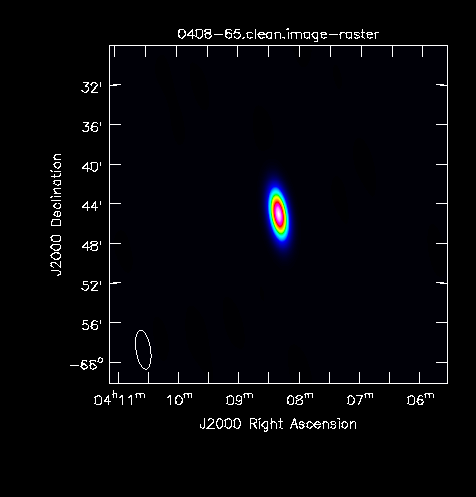

Show log 2019-08-22 15:13:33	INFO	viewer::::	
 2019-08-22 15:13:33	INFO	viewer::::+	##########################################
 2019-08-22 15:13:33	INFO	viewer::::+	##### Begin Task: viewer #####
 2019-08-22 15:13:33	INFO	viewer::::	viewer(infile="0408-65.clean.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2019-08-22 15:13:33	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2019-08-22 15:13:33	INFO	viewer::::	##### End Task: viewer #####
 2019-08-22 15:13:33	INFO	viewer::::+	##########################################

In [17]:
viewer(clean_img+'.image')

In [18]:
target='1117-248'  # Flux calibrator
split_ms=target+'_split.ms'
dirty_img=target+'.dirty'
clean_img=target+'.clean'

In [19]:
split(vis=msfile, outputvis=split_ms, field=target, datacolumn='corrected')

True

Show log 2019-08-22 15:14:18	INFO	split::::	
 2019-08-22 15:14:18	INFO	split::::+	##########################################
 2019-08-22 15:14:18	INFO	split::::+	##### Begin Task: split #####
 2019-08-22 15:14:18	INFO	split::::	split(vis="ngc3621_fixvis.ms",outputvis="1117-248_split.ms",keepmms=True,field="1117-248",spw="",
 2019-08-22 15:14:18	INFO	split::::+ scan="",antenna="",correlation="",timerange="",intent="",
 2019-08-22 15:14:18	INFO	split::::+ array="",uvrange="",observation="",feed="",datacolumn="corrected",
 2019-08-22 15:14:18	INFO	split::::+ keepflags=True,width=1,timebin="0s",combine="")
 2019-08-22 15:14:18	INFO	MSTransformManager::parseMsSpecParams	Input file name is ngc3621_fixvis.ms
 2019-08-22 15:14:18	INFO	MSTransformManager::parseMsSpecParams	Data column is CORRECTED
 2019-08-22 15:14:18	INFO	MSTransformManager::parseMsSpecParams	Output file name is 1117-248_split.ms
 2019-08-22 15:14:18	INFO	MSTransformManager::parseDataSelParams	field selection is 1117-248
 2019-08-22 15:14:18	INFO	MSTransformManager::colCheckInfo	Adding DATA column to output MS from input CORRECTED_DATA column
 2019-08-22 15:14:18	INFO	MSTransformManager::initDataSelectionParams	Selected Fields Ids are [2]
 2019-08-22 15:14:18	INFO	MSTransformManager::open	Select data
 2019-08-22 15:14:18	INFO	MSTransformManager::createOutputMSStructure	Create output MS structure
 2019-08-22 15:14:18	INFO	MSTransformDataHandler::makeSelection	3108 out of 15687 rows are going to be considered due to the selection criteria.
 2019-08-22 15:14:19	INFO	split::::	CASA Version 5.5.0-149 
 2019-08-22 15:14:19	INFO	split::::	
 2019-08-22 15:14:19	INFO	split::::	##### End Task: split #####
 2019-08-22 15:14:19	INFO	split::::+	##########################################

In [20]:
tclean(vis=split_ms, imagename=dirty_img, niter=0)

{}

Show log 2019-08-22 15:15:55	INFO	tclean::::	
 2019-08-22 15:15:55	INFO	tclean::::+	##########################################
 2019-08-22 15:15:55	INFO	tclean::::+	##### Begin Task: tclean #####
 2019-08-22 15:15:55	INFO	tclean::::	tclean(vis="1117-248_split.ms",selectdata=True,field="",spw="",timerange="",
 2019-08-22 15:15:55	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2019-08-22 15:15:55	INFO	tclean::::+ datacolumn="corrected",imagename="1117-248.dirty",imsize=[100],cell=['1arcsec'],phasecenter="",
 2019-08-22 15:15:55	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="mfs",reffreq="",
 2019-08-22 15:15:55	INFO	tclean::::+ nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
 2019-08-22 15:15:55	INFO	tclean::::+ restfreq=[],interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2019-08-22 15:15:55	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2019-08-22 15:15:55	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2019-08-22 15:15:55	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2019-08-22 15:15:55	INFO	tclean::::+ deconvolver="hogbom",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2019-08-22 15:15:55	INFO	tclean::::+ restoringbeam=[],pbcor=False,outlierfile="",weighting="natural",robust=0.5,
 2019-08-22 15:15:55	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=0,gain=0.1,
 2019-08-22 15:15:55	INFO	tclean::::+ threshold=0.0,nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2019-08-22 15:15:55	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2019-08-22 15:15:55	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2019-08-22 15:15:55	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2019-08-22 15:15:55	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2019-08-22 15:15:55	INFO	tclean::::+ calcpsf=True,parallel=False)
 2019-08-22 15:15:55	INFO	tclean::::	Verifying Input Parameters
 2019-08-22 15:15:55	INFO	SynthesisImagerVi2::selectData MS : 1117-248_split.ms | [Opened in readonly mode]
 2019-08-22 15:15:55	INFO	SynthesisImagerVi2::selectData NRows selected : 3108
 2019-08-22 15:15:55	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [1117-248.dirty] : 
 2019-08-22 15:15:55	INFO	SynthesisImagerVi2::defineImage Impars : start 
 2019-08-22 15:15:55	INFO	SynthesisImagerVi2::defineImage Shape : [100, 100, 1, 1]Spectral : [1.41117e+09] at [0] with increment [2.3512e+07]
 2019-08-22 15:15:55	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [1117-248.dirty] with ftmachine : gridft
 2019-08-22 15:15:55	INFO	SynthesisImagerVi2::weight() Set imaging weights : Natural weighting
 2019-08-22 15:15:55	INFO	task_tclean::SynthesisDeconvolver::setupDeconvolution Set Deconvolution Options for [1117-248.dirty] : hogbom
 2019-08-22 15:15:55	INFO	task_tclean::SynthesisImager::makePSF ----------------------------------------------------------- Make PSF ---------------------------------------------
 2019-08-22 15:15:56	INFO	task_tclean::SIImageStore::calcSensitivity [1117-248.dirty] Theoretical sensitivity (Jy/bm):0.00026503 
 2019-08-22 15:15:56	INFO	task_tclean::SIImageStore::printBeamSet Beam : 347.428 arcsec, 116.98 arcsec, 84.0861 deg
 2019-08-22 15:15:56	INFO	task_tclean::PBMath::initByDiameter PBMath init to Airy scaled to diameter = 13.5
 2019-08-22 15:15:56	INFO	task_tclean::SynthesisImagerVi2::makePrimaryBeam vi2 : Evaluating Primary Beam model onto image grid(s)
 2019-08-22 15:15:56	INFO	task_tclean::SynthesisImager::executeMajorCycle ----------------------------------------------------------- Run (Last) Major Cycle 1 -------------------------------------
 2019-

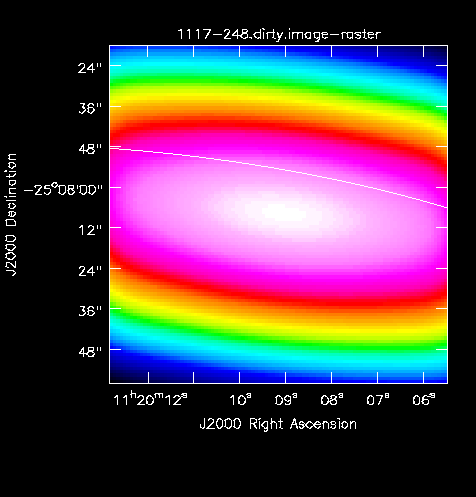

Show log 2019-08-22 15:16:01	INFO	viewer::::	
 2019-08-22 15:16:01	INFO	viewer::::+	##########################################
 2019-08-22 15:16:01	INFO	viewer::::+	##### Begin Task: viewer #####
 2019-08-22 15:16:01	INFO	viewer::::	viewer(infile="1117-248.dirty.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2019-08-22 15:16:01	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2019-08-22 15:16:02	INFO	viewer::::	##### End Task: viewer #####
 2019-08-22 15:16:02	INFO	viewer::::+	##########################################

In [21]:
viewer(dirty_img+'.image')

In [22]:
tclean(vis=split_ms,
      imagename=clean_img,
      niter=20000,
      threshold='0.005Jy',
      deconvolver='hogbom',
      imsize=1024,
      cell='2.0arcsec',
      stokes='I',
      weighting='briggs',
      robust=0.0)

{}

Show log 2019-08-22 15:16:08	INFO	tclean::::	
 2019-08-22 15:16:08	INFO	tclean::::+	##########################################
 2019-08-22 15:16:08	INFO	tclean::::+	##### Begin Task: tclean #####
 2019-08-22 15:16:08	INFO	tclean::::	tclean(vis="1117-248_split.ms",selectdata=True,field="",spw="",timerange="",
 2019-08-22 15:16:08	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2019-08-22 15:16:08	INFO	tclean::::+ datacolumn="corrected",imagename="1117-248.clean",imsize=1024,cell="2.0arcsec",phasecenter="",
 2019-08-22 15:16:08	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="mfs",reffreq="",
 2019-08-22 15:16:08	INFO	tclean::::+ nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
 2019-08-22 15:16:08	INFO	tclean::::+ restfreq=[],interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2019-08-22 15:16:08	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2019-08-22 15:16:08	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2019-08-22 15:16:08	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2019-08-22 15:16:08	INFO	tclean::::+ deconvolver="hogbom",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2019-08-22 15:16:08	INFO	tclean::::+ restoringbeam=[],pbcor=False,outlierfile="",weighting="briggs",robust=0.0,
 2019-08-22 15:16:08	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=20000,gain=0.1,
 2019-08-22 15:16:08	INFO	tclean::::+ threshold="0.005Jy",nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2019-08-22 15:16:08	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2019-08-22 15:16:08	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2019-08-22 15:16:08	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2019-08-22 15:16:08	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2019-08-22 15:16:08	INFO	tclean::::+ calcpsf=True,parallel=False)
 2019-08-22 15:16:08	INFO	tclean::::	Verifying Input Parameters
 2019-08-22 15:16:08	INFO	SynthesisImagerVi2::selectData MS : 1117-248_split.ms | [Opened in readonly mode]
 2019-08-22 15:16:08	INFO	SynthesisImagerVi2::selectData NRows selected : 3108
 2019-08-22 15:16:08	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [1117-248.clean] : 
 2019-08-22 15:16:08	INFO	SynthesisImagerVi2::defineImage Impars : start 
 2019-08-22 15:16:08	INFO	SynthesisImagerVi2::defineImage Shape : [1024, 1024, 1, 1]Spectral : [1.41117e+09] at [0] with increment [2.3512e+07]
 2019-08-22 15:16:08	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [1117-248.clean] with ftmachine : gridft
 2019-08-22 15:16:08	INFO	SynthesisImagerVi2::weight() Set imaging weights : Briggs weighting: sidelobes will be suppressed over full image
 2019-08-22 15:16:08	INFO	VisSetUtil::VisImagingWeight() Normal robustness, robust = 0
 2019-08-22 15:16:08	INFO	task_tclean::SynthesisDeconvolver::setupDeconvolution Set Deconvolution Options for [1117-248.clean] : hogbom
 2019-08-22 15:16:08	INFO	task_tclean::SynthesisIterBot::setupIteration Set Iteration Control Options
 2019-08-22 15:16:08	INFO	task_tclean::SynthesisImager::makePSF ----------------------------------------------------------- Make PSF ---------------------------------------------
 2019-08-22 15:16:09	INFO	task_tclean::SIImageStore::calcSensitivity [1117-248.clean] Theoretical sensitivity (Jy/bm):0.00118856 
 2019-08-22 15:16:09	INFO	task_tclean::SIImageStore::printBeamSet Beam : 354.53 arcsec, 107.332 arcsec, 85.1329 deg
 2019-08-22 15:16:09	INFO	task_tclean::PBMath::initByDiameter PBMath init to Airy scaled to diameter = 13.5
 2019-08-22 15:16:09	INFO	task_tclean::SynthesisImagerVi2::makePrimaryBeam vi2 : Evaluati

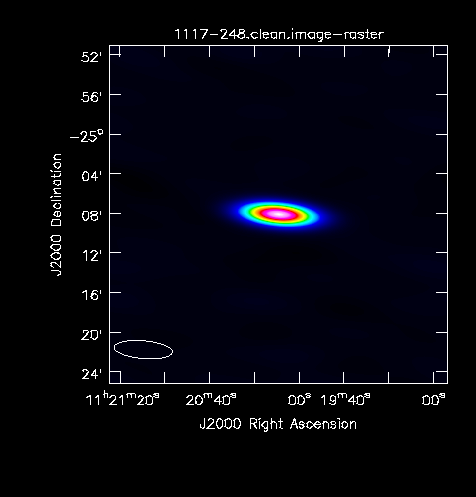

Show log 2019-08-22 15:16:49	INFO	viewer::::	
 2019-08-22 15:16:49	INFO	viewer::::+	##########################################
 2019-08-22 15:16:49	INFO	viewer::::+	##### Begin Task: viewer #####
 2019-08-22 15:16:49	INFO	viewer::::	viewer(infile="1117-248.clean.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2019-08-22 15:16:49	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2019-08-22 15:16:50	INFO	viewer::::	##### End Task: viewer #####
 2019-08-22 15:16:50	INFO	viewer::::+	##########################################

In [23]:
viewer(clean_img+'.image')

In [24]:
target='NGC3621'  # Flux calibrator
split_ms=target+'_split.ms'
dirty_img=target+'.dirty'
clean_img=target+'.clean'

In [25]:
split(vis=msfile, outputvis=split_ms, field=target, datacolumn='corrected')

True

Show log 2019-08-22 15:16:57	INFO	split::::	
 2019-08-22 15:16:57	INFO	split::::+	##########################################
 2019-08-22 15:16:57	INFO	split::::+	##### Begin Task: split #####
 2019-08-22 15:16:57	INFO	split::::	split(vis="ngc3621_fixvis.ms",outputvis="NGC3621_split.ms",keepmms=True,field="NGC3621",spw="",
 2019-08-22 15:16:57	INFO	split::::+ scan="",antenna="",correlation="",timerange="",intent="",
 2019-08-22 15:16:57	INFO	split::::+ array="",uvrange="",observation="",feed="",datacolumn="corrected",
 2019-08-22 15:16:57	INFO	split::::+ keepflags=True,width=1,timebin="0s",combine="")
 2019-08-22 15:16:57	INFO	MSTransformManager::parseMsSpecParams	Input file name is ngc3621_fixvis.ms
 2019-08-22 15:16:57	INFO	MSTransformManager::parseMsSpecParams	Data column is CORRECTED
 2019-08-22 15:16:57	INFO	MSTransformManager::parseMsSpecParams	Output file name is NGC3621_split.ms
 2019-08-22 15:16:57	INFO	MSTransformManager::parseDataSelParams	field selection is NGC3621
 2019-08-22 15:16:57	INFO	MSTransformManager::colCheckInfo	Adding DATA column to output MS from input CORRECTED_DATA column
 2019-08-22 15:16:57	INFO	MSTransformManager::initDataSelectionParams	Selected Fields Ids are [1]
 2019-08-22 15:16:57	INFO	MSTransformManager::open	Select data
 2019-08-22 15:16:57	INFO	MSTransformManager::createOutputMSStructure	Create output MS structure
 2019-08-22 15:16:57	INFO	MSTransformDataHandler::makeSelection	9450 out of 15687 rows are going to be considered due to the selection criteria.
 2019-08-22 15:16:58	INFO	split::::	CASA Version 5.5.0-149 
 2019-08-22 15:16:58	INFO	split::::	
 2019-08-22 15:16:58	INFO	split::::	##### End Task: split #####
 2019-08-22 15:16:58	INFO	split::::+	##########################################

In [26]:
tclean(vis=split_ms, imagename=dirty_img, niter=0)

{}

Show log 2019-08-22 15:17:01	INFO	tclean::::	
 2019-08-22 15:17:01	INFO	tclean::::+	##########################################
 2019-08-22 15:17:01	INFO	tclean::::+	##### Begin Task: tclean #####
 2019-08-22 15:17:01	INFO	tclean::::	tclean(vis="NGC3621_split.ms",selectdata=True,field="",spw="",timerange="",
 2019-08-22 15:17:01	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2019-08-22 15:17:01	INFO	tclean::::+ datacolumn="corrected",imagename="NGC3621.dirty",imsize=[100],cell=['1arcsec'],phasecenter="",
 2019-08-22 15:17:01	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="mfs",reffreq="",
 2019-08-22 15:17:01	INFO	tclean::::+ nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
 2019-08-22 15:17:01	INFO	tclean::::+ restfreq=[],interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2019-08-22 15:17:01	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2019-08-22 15:17:01	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2019-08-22 15:17:01	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2019-08-22 15:17:01	INFO	tclean::::+ deconvolver="hogbom",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2019-08-22 15:17:01	INFO	tclean::::+ restoringbeam=[],pbcor=False,outlierfile="",weighting="natural",robust=0.5,
 2019-08-22 15:17:01	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=0,gain=0.1,
 2019-08-22 15:17:01	INFO	tclean::::+ threshold=0.0,nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2019-08-22 15:17:01	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2019-08-22 15:17:01	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2019-08-22 15:17:01	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2019-08-22 15:17:01	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2019-08-22 15:17:01	INFO	tclean::::+ calcpsf=True,parallel=False)
 2019-08-22 15:17:01	INFO	tclean::::	Verifying Input Parameters
 2019-08-22 15:17:01	INFO	SynthesisImagerVi2::selectData MS : NGC3621_split.ms | [Opened in readonly mode]
 2019-08-22 15:17:01	INFO	SynthesisImagerVi2::selectData NRows selected : 9450
 2019-08-22 15:17:01	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [NGC3621.dirty] : 
 2019-08-22 15:17:01	INFO	SynthesisImagerVi2::defineImage Impars : start 
 2019-08-22 15:17:01	INFO	SynthesisImagerVi2::defineImage Shape : [100, 100, 1, 1]Spectral : [1.41116e+09] at [0] with increment [2.35119e+07]
 2019-08-22 15:17:01	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [NGC3621.dirty] with ftmachine : gridft
 2019-08-22 15:17:01	INFO	SynthesisImagerVi2::weight() Set imaging weights : Natural weighting
 2019-08-22 15:17:01	INFO	task_tclean::SynthesisDeconvolver::setupDeconvolution Set Deconvolution Options for [NGC3621.dirty] : hogbom
 2019-08-22 15:17:01	INFO	task_tclean::SynthesisImager::makePSF ----------------------------------------------------------- Make PSF ---------------------------------------------
 2019-08-22 15:17:04	INFO	task_tclean::SIImageStore::calcSensitivity [NGC3621.dirty] Theoretical sensitivity (Jy/bm):0.000151992 
 2019-08-22 15:17:04	INFO	task_tclean::SIImageStore::printBeamSet Beam : 350.708 arcsec, 106.759 arcsec, 84.8854 deg
 2019-08-22 15:17:04	INFO	task_tclean::PBMath::initByDiameter PBMath init to Airy scaled to diameter = 13.5
 2019-08-22 15:17:04	INFO	task_tclean::SynthesisImagerVi2::makePrimaryBeam vi2 : Evaluating Primary Beam model onto image grid(s)
 2019-08-22 15:17:05	INFO	task_tclean::SynthesisImager::executeMajorCycle ----------------------------------------------------------- Run (Last) Major Cycle 1 -------------------------------------
 2019-08-2

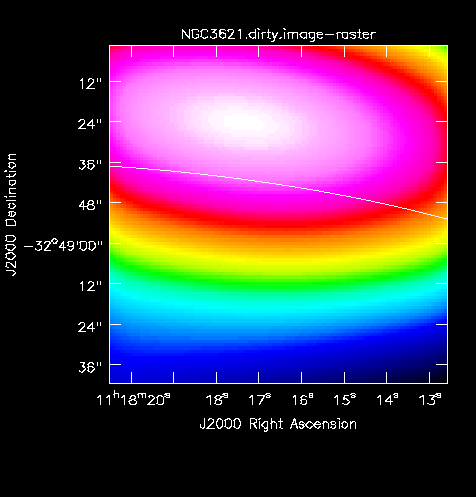

Show log 2019-08-22 15:17:09	INFO	viewer::::	
 2019-08-22 15:17:09	INFO	viewer::::+	##########################################
 2019-08-22 15:17:09	INFO	viewer::::+	##### Begin Task: viewer #####
 2019-08-22 15:17:09	INFO	viewer::::	viewer(infile="NGC3621.dirty.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2019-08-22 15:17:09	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2019-08-22 15:17:09	INFO	viewer::::	##### End Task: viewer #####
 2019-08-22 15:17:09	INFO	viewer::::+	##########################################

In [27]:
viewer(dirty_img+'.image')

In [35]:
tclean(vis=split_ms,
      imagename=clean_img,
      niter=20000,
#      threshold='0.001Jy',
      threshold='0.0007Jy',
      deconvolver='hogbom',
      imsize=1024,
      cell='2.0arcsec',
      stokes='I',
      weighting='briggs',
      robust=0.0)

KeyboardInterrupt: 

Show log 2019-08-22 15:39:47	INFO	tclean::::	
 2019-08-22 15:39:47	INFO	tclean::::+	##########################################
 2019-08-22 15:39:47	INFO	tclean::::+	##### Begin Task: tclean #####
 2019-08-22 15:39:47	INFO	tclean::::	tclean(vis="NGC3621_split.ms",selectdata=True,field="",spw="",timerange="",
 2019-08-22 15:39:47	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2019-08-22 15:39:47	INFO	tclean::::+ datacolumn="corrected",imagename="NGC3621.clean",imsize=1024,cell="2.0arcsec",phasecenter="",
 2019-08-22 15:39:47	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="mfs",reffreq="",
 2019-08-22 15:39:47	INFO	tclean::::+ nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
 2019-08-22 15:39:47	INFO	tclean::::+ restfreq=[],interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2019-08-22 15:39:47	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2019-08-22 15:39:47	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2019-08-22 15:39:47	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2019-08-22 15:39:47	INFO	tclean::::+ deconvolver="hogbom",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2019-08-22 15:39:47	INFO	tclean::::+ restoringbeam=[],pbcor=False,outlierfile="",weighting="briggs",robust=0.0,
 2019-08-22 15:39:47	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=20000,gain=0.1,
 2019-08-22 15:39:47	INFO	tclean::::+ threshold="0.0007Jy",nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2019-08-22 15:39:47	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2019-08-22 15:39:47	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2019-08-22 15:39:47	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2019-08-22 15:39:47	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2019-08-22 15:39:47	INFO	tclean::::+ calcpsf=True,parallel=False)
 2019-08-22 15:39:47	INFO	tclean::::	Verifying Input Parameters
 2019-08-22 15:39:47	INFO	SynthesisImagerVi2::selectData MS : NGC3621_split.ms | [Opened in readonly mode]
 2019-08-22 15:39:47	INFO	SynthesisImagerVi2::selectData NRows selected : 9450
 2019-08-22 15:39:47	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [NGC3621.clean] : 
 2019-08-22 15:39:47	INFO	SynthesisImagerVi2::defineImage Impars : start 
 2019-08-22 15:39:47	INFO	SynthesisImagerVi2::defineImage Shape : [1024, 1024, 1, 1]Spectral : [1.41116e+09] at [0] with increment [2.35119e+07]
 2019-08-22 15:39:47	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [NGC3621.clean] with ftmachine : gridft
 2019-08-22 15:39:47	INFO	SynthesisImagerVi2::weight() Set imaging weights : Briggs weighting: sidelobes will be suppressed over full image
 2019-08-22 15:39:49	INFO	VisSetUtil::VisImagingWeight() Normal robustness, robust = 0
 2019-08-22 15:39:49	INFO	task_tclean::SynthesisDeconvolver::setupDeconvolution Set Deconvolution Options for [NGC3621.clean] : hogbom
 2019-08-22 15:39:49	INFO	task_tclean::SynthesisIterBot::setupIteration Set Iteration Control Options
 2019-08-22 15:39:49	INFO	task_tclean::SynthesisImager::makePSF ----------------------------------------------------------- Make PSF ---------------------------------------------
 2019-08-22 15:39:52	INFO	task_tclean::SIImageStore::calcSensitivity [NGC3621.clean] Theoretical sensitivity (Jy/bm):0.000673541 
 2019-08-22 15:39:52	INFO	task_tclean::SIImageStore::printBeamSet Beam : 351.837 arcsec, 94.4931 arcsec, 86.7487 deg
 2019-08-22 15:39:52	INFO	task_tclean::PBMath::initByDiameter PBMath init to Airy scaled to diameter = 13.5
 2019-08-22 15:39:52	INFO	task_tclean::SynthesisImagerVi2::makePrimaryBeam vi2 : Evaluating 

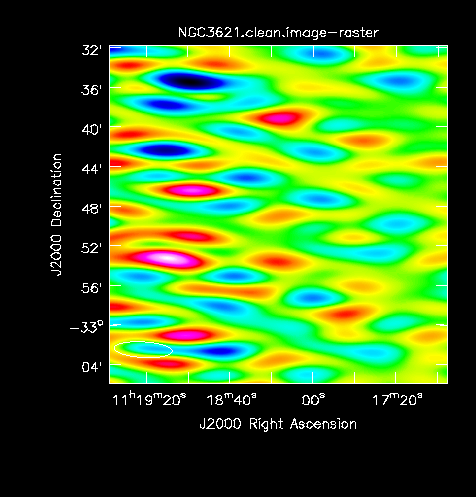

Show log 2019-08-22 15:38:44	INFO	viewer::::	
 2019-08-22 15:38:44	INFO	viewer::::+	##########################################
 2019-08-22 15:38:44	INFO	viewer::::+	##### Begin Task: viewer #####
 2019-08-22 15:38:44	INFO	viewer::::	viewer(infile="NGC3621.clean.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2019-08-22 15:38:44	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2019-08-22 15:38:44	INFO	viewer::::	##### End Task: viewer #####
 2019-08-22 15:38:44	INFO	viewer::::+	##########################################

In [33]:
viewer(clean_img+'.image')